In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

# <center>ANALISIS DE LA TASA DE SUICIDIOS A NIVEL MUNDIAL </center>

- Jorge Andres Mogotocoro Fajardo - 2160075
- Jheyson Arley Jaimes Esteban - 2160076
- Andres Ricardo Hernandez Torres - 2122274

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#url example './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/'
# ./drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/master.csv

**No olvidar poner en la variable path la direccion de drive donde se trabaja...** \\
**NOTA:** Experimentando un poco he llegado a la conclusion que no es tan eficiente trabajar varios en un mismos documento por tanto sugiero lo siguiente:

- Las variables *path* dado que es dependiente de cada uno por favor usar celdas independiente con su propia direccion asi el proximo que llegue a editar puede volver a ejecutar su progreso anterior.
- No editar las celdas ya implementadas, en lo posible mejor agregar comentarios sobre dudas o errores cometidos.

#  <CENTER>MOTIVACIÓN:
    
![texto alternativo](https://github.com/Jamf05/20191-ai-class-project/blob/master/suicidios.png?raw=true)

#### Contenido:
Este conjunto de datos compilado se extrajo de otros cuatro conjuntos de datos vinculados por tiempo y lugar, y se creó para encontrar señales correlacionadas con el aumento de las tasas de suicidio entre diferentes cohortes a nivel mundial, en todo el espectro socioeconómico.

#### Columnas:
país, año, sexo, grupo de edad, conteo de suicidios, población, tasa de suicidios, clave compuesta país-año, IDH por año, gdp_for_year, gdp_per_capita, generación (según el promedio de agrupación por edad).

#### Definiciones:

- **HDI (IDH):** Indice de desarrollo humano. Es un indicador sintético de los logros,medios obtenidos en las dimensiones fundamentales del desarrollo humano, a saber, tener una vida larga y saludable, adquirir conocimientos y disfrutar de un nivel de vida digno.
- **GDP (PIB):** Producto interno bruto. En unidades de (Dólares estadounidenses actuales). Las fuentes incluyen: Banco Mundial, Naciones Unidas.

# <center>Objetivos :</center>

#### Regresion (**La clases pertenecen a los reales**):

- Predecir el numero de suicidos (suicides_no) para unos determinados datos de entrada (country, year, sex, age, ¿population?).
- Precedir la probabilidad de que una persona se suicide (**suicides_no(desconocido) / population**) segun ciertas condiciones (**Locacion especifica, condiciones de vida, ...**) <p> **Posibles complicaciones**: Solo se estaria determinando la probabilidad a partir de las condiciones de vida economicas del pais dejando de lado las personales, ¿hasta que punto es posible realizar regresion? teniendo en cuenta la caractaristica **year**.</p>
- Determinar patrones de acuerdo a ciertas caracteristicas que presenten mayor influencia en las tazas de suicidios.

# <center><strong>Tratamiento de datos:</strong></font></center>
### A continuacion se procede a cargar el dataset de suicidios que se encuentran en formato csv disponible en la pagina de kaggle en el siguiente enlace: <br><br><center> https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
</center>
### Ademas se carga el dataset de codigo de paises para ser codificados disponible en formato csv en el siguiente enlace:<br><br><center> https://gist.github.com/radcliff/f09c0f88344a7fcef373 </center>

In [0]:
# No olvidar poner en la variable path la direccion de drive donde se trabaja...
path = './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/' 

In [0]:
d = pd.read_csv('master.csv')
country_codes = pd.read_csv("wikipedia-iso-country-codes.csv")
print d.shape

(27820, 12)


In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
country_codes.head()

,English_short_name_lower_case,Alpha-2_code,Alpha-3_code,Numeric_code,ISO_3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [0]:
d.tail()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [0]:
set(d.values[:,3])
#set(d.values[:,3])
#set(d.values[:,0])
#set(d.values[:,1])

{'15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years'}

# <center>Eleccion de caracteristicas:</center>
<p> X { <b>country (string) ,year ,sex ,age (string),suicides_no ,population ,HDI for year ,gdp_for_year ,gdp_per_capita ,generation (string)} </b></p>
<p> y { <b> suicides_no </b> } </p>
<p> <b>Posibles complicaciones</b>: <b>country</b> debe pasarse a valores de cordenadas o una representacion numerica, <b>sex</b> podria tomar valores de 0 y 1, ¿como deberia manejarse <b>generacion</b>?</p>

# <center>Countries
Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan

In [0]:
country_codes.head()

,English_short_name_lower_case,Alpha-2_code,Alpha-3_code,Numeric_code,ISO_3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


'Cabo Verde',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines'}

In [0]:
d.country.values[d.country.values == "Cabo Verde"] = "Cape Verde"
d.country.values[d.country.values == "Macau"] = "Macao"
d.country.values[d.country.values == "Republic of Korea"] = "Korea, Republic of"
d.country.values[d.country.values == "Saint Vincent and Grenadines"] = "Saint Vincent and the Grenadines"

In [0]:
for i in range(d.values[:,0].shape[0]):
    new = country_codes.Numeric_code.values[country_codes.English_short_name_lower_case.values == d.country.values[i]]
    if (new.shape[0] != 0):
        d.country.values[i] = new[0]

In [0]:
set(d.values[:,0])

{8,
 28,
 31,
 32,
 36,
 40,
 44,
 48,
 51,
 52,
 56,
 70,
 76,
 84,
 100,
 112,
 124,
 132,
 144,
 152,
 170,
 188,
 191,
 192,
 196,
 203,
 208,
 212,
 218,
 222,
 233,
 242,
 246,
 250,
 268,
 276,
 296,
 300,
 308,
 320,
 328,
 348,
 352,
 372,
 376,
 380,
 388,
 392,
 398,
 410,
 414,
 417,
 428,
 440,
 442,
 446,
 462,
 470,
 480,
 484,
 496,
 499,
 512,
 528,
 533,
 554,
 558,
 578,
 591,
 600,
 608,
 616,
 620,
 630,
 634,
 642,
 643,
 659,
 662,
 670,
 674,
 688,
 690,
 702,
 703,
 705,
 710,
 724,
 740,
 752,
 756,
 764,
 780,
 784,
 792,
 795,
 804,
 826,
 840,
 858,
 860}

# <center>Age
los datos de las edades se encuentran divididos en 6 grupos y estos van a ser modificados dandoles un unico valor numerico
<center><br>
'5-14 years' , '15-24 years',<br>
'25-34 years' , '35-54 years',<br>
'55-74 years' , '75+ years'<br></center>



In [0]:
d.age.values[d.age.values == "5-14 years"] = 0
d.age.values[d.age.values == "15-24 years"] = 1
d.age.values[d.age.values == "25-34 years"] = 2
d.age.values[d.age.values == "35-54 years"] = 3
d.age.values[d.age.values == "55-74 years"] = 4
d.age.values[d.age.values == "75+ years"] = 5

In [0]:
set(d.values[:,3])

{0, 1, 2, 3, 4, 5}

## <center> Generation</center>
Se encuentran en 6 grupos de generaciones

'Boomers',
 'G.I. Generation',
 'Generation X',
 'Generation Z',
 'Millenials',
 'Silent'

In [0]:
d.generation.values[d.generation.values == "G.I. Generation"] = 0 #
d.generation.values[d.generation.values == "Silent"] = 1 #
d.generation.values[d.generation.values == "Boomers"] = 2 #
d.generation.values[d.generation.values == "Generation X"] = 3 #
d.generation.values[d.generation.values == "Millenials"] = 4 #
d.generation.values[d.generation.values == "Generation Z"] = 5 #

In [0]:
set(d.values[:,11])

{0, 1, 2, 3, 4, 5}

# <center>Sex</center>
Encontramos 2 sexos en el dataset los cuales se van a codificar con un numero para identificarlos: 0 para los hombre y el 1 para las mujeres

'male', 'female'

In [0]:
d.sex.values[d.sex.values == "male"] = 0
d.sex.values[d.sex.values == "female"] = 1

# <center> Gdp for year ($)

	63,067,077,179 = 63.07 ( se entiende como GDP ( Billions of US $)

In [0]:
for i in range(d.values[:,0].shape[0]):
    res = d.gdp_for_year.values[i].split(',')
    d.gdp_for_year.values[i] = round(float(''.join(res))/1000000000,3)

print(min(d.gdp_for_year.values))
print(max(d.gdp_for_year.values))

0.047
18120.714


# <center> NaN

La columna que mas datos presenta en NaN es **HDI_for_year** por tanto se propone reemplazar los valores NaN de cada pais con el primedio para no alterar la tendencia de cada pais.

In [0]:
NaN = []
for i in np.unique(d.country):
  mean = np.mean(d.HDI_for_year[d.country == i])
  if (np.isnan(mean)):
    NaN.append(i)
NaN

[132, 212, 296, 410, 446, 496, 533, 630, 643, 659, 674]

<h1><center>**Conclusion:** </center></h1>
Existian paises a los cuales su columna de **HDI_for_year** era totalmente nula por tanto se procede a descartarlos del dataset dado que no hacen ningun aporte.

In [0]:
for i in NaN:
    d.drop(d.index[d.country == i].values, inplace=True)

d.reset_index(inplace=True)
d.drop(columns = "index", inplace=True)
d.index

RangeIndex(start=0, stop=26334, step=1)

Los paises que contienen registros sobre su **HDI_for_year** se procede a remplazar valores NaN con el promedio de los existentes.

In [0]:
for i in np.unique(d.country):
    d["HDI_for_year"][d.country==i]=d["HDI_for_year"][d.country==i].fillna(value=np.mean(d["HDI_for_year"][d.country==i]))

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**NOTA:** Posiblemente al calcular el valor de la media se esta almacenando numeros de tipo flotante demaciado grandes por lo tanto corregir que solo guarde maximo 3 cifras decimales. Ejemplo: 0.7132000000000001

In [0]:
d.HDI_for_year = d.HDI_for_year.round(3)

<h1><center>**Prueba de nulidad** 

In [0]:
np.prod(pd.notnull(d))

country              1
year                 1
sex                  1
age                  1
suicides_no          1
population           1
suicides/100k_pop    1
country-year         1
HDI_for_year         1
gdp_for_year         1
gdp_per_capita       1
generation           1
dtype: int64

# <center> Zeros

Aquellos paises con numeros de suicidios **suidices_no** en 0 y años antes y despues no muy lejanos presentan valores con cierta tendencia es muy probable que ese registro no fuera tomado y/o se haya perdido por lo tanto lo mejor seria resplazarlos con la media.

In [0]:
def zeros(condicion, umbral):
  # Da informacion sobre que paises poseen una mayor cantidad de registros con numeros de suicidios en 0

  #umbral: porcentaje [0-100]
  #country_N: nombres de paises
  #country_No: codigo de paises
  #N_zeros: cantitad de registros que NO tienen 0
  #N_total: total de registros
  #NOTA: La columna "country" ya debe haber sido convertida a codigos

    cod_pais = []
    nom_pais = []
    no_zeros = []
    no_registros = []
    porcentaje = []

    for i in country_codes.Numeric_code.values:
        country_N = country_codes.English_short_name_lower_case[country_codes.Numeric_code == i].values[0]
        country_No = country_codes.Numeric_code[country_codes.Numeric_code == i].values[0]
        N_zeros = np.count_nonzero(d.suicides_no[d.country == i])
        N_total = len(d.suicides_no[d.country == i])
        if (N_total != 0):
            P_final = 100 - float(N_zeros)/N_total*100
            if (P_final > umbral and condicion == "mayor"):  #Umbral de filtrado
                cod_pais.append(country_No)
                nom_pais.append(country_N)
                no_zeros.append(N_total - N_zeros)
                no_registros.append(N_total)
                porcentaje.append(P_final)
            if (P_final < umbral and condicion == "menor"): #Umbral de filtrado
                cod_pais.append(country_No)
                nom_pais.append(country_N)
                no_zeros.append(N_total - N_zeros)
                no_registros.append(N_total)
                porcentaje.append(P_final)

    zeros = {"cod_pais": cod_pais,
           "nom_pais": nom_pais,
           "no_zeros": no_zeros,
           "no_registros": no_registros,
           "porcentaje": porcentaje}
    zeros_df = pd.DataFrame(data=zeros, columns = ["cod_pais","nom_pais","no_zeros","no_registros","porcentaje"])
    return zeros_df

In [0]:
zeros("mayor", 99)

,cod_pais,nom_pais,no_zeros,no_registros,porcentaje


**Conclusion 1:** Tomando como referencia la cantidad de zeros presentes en la columna "suicides_no" con respecto a la cantidad de registros presentes y con un humbral del 100% se puede descartar los siguientes paises dado que sus datos no aparentar ser correctos o en su totalidad son faltantes:
- Dominica
- Saint Kitts and Nevis

In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,8,1987,0,1,21,312900,6.71,Albania1987,0.673,2.157,796,3
1,8,1987,0,3,16,308000,5.19,Albania1987,0.673,2.157,796,1
2,8,1987,1,1,14,289700,4.83,Albania1987,0.673,2.157,796,3
3,8,1987,0,5,1,21800,4.59,Albania1987,0.673,2.157,796,0
4,8,1987,0,2,9,274300,3.28,Albania1987,0.673,2.157,796,2


In [0]:
d.drop(d.index[d.country == 212].values, inplace=True)
d.drop(d.index[d.country == 659].values, inplace=True)

d.reset_index(inplace=True)
d.drop(columns = "index", inplace=True)
d.index

RangeIndex(start=0, stop=26334, step=1)

In [0]:
d.drop(columns = d.columns[7], inplace=True)
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,8,1987,0,1,21,312900,6.71,0.673,2.157,796,3
1,8,1987,0,3,16,308000,5.19,0.673,2.157,796,1
2,8,1987,1,1,14,289700,4.83,0.673,2.157,796,3
3,8,1987,0,5,1,21800,4.59,0.673,2.157,796,0
4,8,1987,0,2,9,274300,3.28,0.673,2.157,796,2


In [0]:
zeros("menor", 50)

,cod_pais,nom_pais,no_zeros,no_registros,porcentaje
0,8,Albania,58,264,21.969697
1,32,Argentina,0,372,0.000000
2,51,Armenia,46,298,15.436242
3,36,Australia,3,360,0.833333
4,40,Austria,9,382,2.356021
5,31,Azerbaijan,27,192,14.062500
6,112,Belarus,0,252,0.000000
7,56,Belgium,7,372,1.881720
8,70,Bosnia and Herzegovina,10,24,41.666667
9,76,Brazil,0,372,0.000000


**Conclusion 2:** Paises que cumplan un umbral del 50% y su poblacion no alcance la media de la poblacion general del data set tambien son posiblemente descartados dado que su significancia es minima.



In [0]:
z = zeros("menor", 0.01)
z

,cod_pais,nom_pais,no_zeros,no_registros,porcentaje
0,32,Argentina,0,372,0.0
1,112,Belarus,0,252,0.0
2,76,Brazil,0,372,0.0
3,124,Canada,0,348,0.0
4,218,Ecuador,0,372,0.0
5,250,France,0,360,0.0
6,276,Germany,0,312,0.0
7,392,Japan,0,372,0.0
8,398,Kazakhstan,0,312,0.0
9,484,Mexico,0,372,0.0


**Conclusion 3:** Paises que cumplan un umbral casi nulo (0%) son posibles candidatos a realizar analisis, dado que son aquellos que presentan mas de un 99.99% de datos sobre sus suicidios que ademas fueron diferentes de 0.


Ahora sabiendo los paises que presentan una mayor confianza respecto a los datos registrados sobre suicidios se pretende remplazar los zeros con la media respecto a cada pais.

In [0]:
for i in set(d.country.values):
  if i in z["cod_pais"].values:
    a = 0
  else:
    d.drop(d.index[d.country == i].values, inplace=True)
    
d.reset_index(inplace=True)
d.drop(columns = "index", inplace=True)
d.index

RangeIndex(start=0, stop=4920, step=1)

In [0]:
set(d["country"])

{32, 76, 112, 124, 144, 218, 250, 276, 392, 398, 484, 616, 792, 804, 840, 860}

Ahora de acuerdo a cada pais que posea valores en 0 para su numero de suicidios se procede a remplazarlo con la media de **suicidios** de ese pais.

In [0]:
for i in np.unique(d.country):
    d["suicides_no"][d.country==i]=d["suicides_no"][d.country==i].replace(0, value=np.mean(d["suicides_no"][d.country==i]))

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**NOTA:** Posiblemente al calcular el valor de la media se esta almacenando numeros de tipo flotante demaciado grandes por lo tanto corregir que solo guarde 3 cifras decimales.

In [0]:
d.suicides_no = d.suicides_no.round(3)

# <center>Exportar nuevo dataset:
    
   <center>se exporta el nuevo dataset despues de ser tratado para trabajar con el </center>

In [0]:
d.shape

(4920, 11)

In [0]:
export_csv = d.to_csv (r'export_dataframe.csv', index = None, header=True)

<strike> **NOTA (19/07/14):** Revizar que el dataframe **export_dataframe.csv** aun tiene problemas de valores NaN. \\
**NOTA (19/07/14):** El problema parece ser de dos paises en concreto **Republic of Korea (410)** y **Russian Federation (643)** <strike>




# <center> Se importa el nuevo dataset

In [0]:
d = pd.read_csv("export_dataframe.csv")
print d.shape

(4920, 11)


In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,1985,0,5,202,363000,55.65,0.694,88.417,3264,0
1,32,1985,0,4,485,1997000,24.29,0.694,88.417,3264,0
2,32,1985,0,3,414,3346300,12.37,0.694,88.417,3264,1
3,32,1985,1,4,210,2304000,9.11,0.694,88.417,3264,0
4,32,1985,0,2,177,2234200,7.92,0.694,88.417,3264,2


In [0]:
country_codes.head()

,English_short_name_lower_case,Alpha-2_code,Alpha-3_code,Numeric_code,ISO_3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


## $X_1$. Graficas:

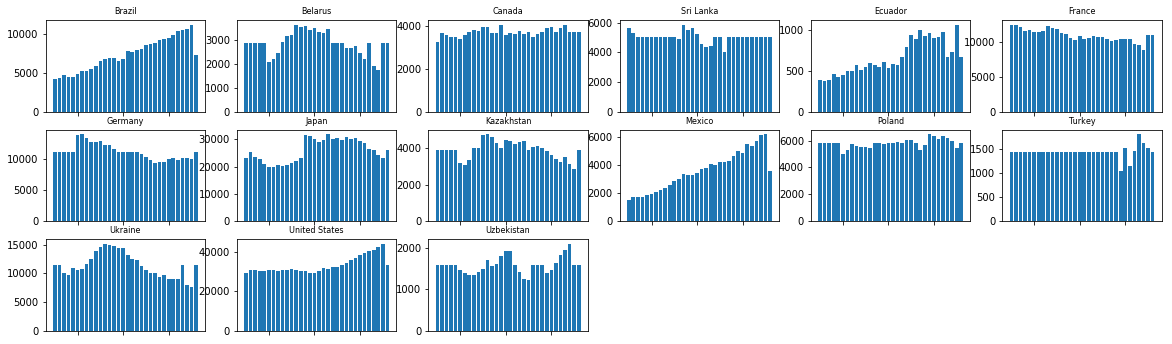

In [0]:
v=np.unique(d.country)
plt.figure(figsize=(20,40))
y=range(1985, 2017)
for i in range(1,len(v)):
    ant=d[d.country==v[i]]
    sn=[]
    for j in y:
        s=ant[ant.year==j].suicides_no.sum()
        sn=np.append(sn,s)
    sn[sn==0]=np.mean(sn[sn>0])
    plt.subplot(20,6,i).set_xticklabels([]),plt.bar(y,sn),plt.title( country_codes.English_short_name_lower_case[country_codes.Numeric_code == v[i]].values[0] , fontsize=8)

## $X_2$: Analisis de dependencias de variables

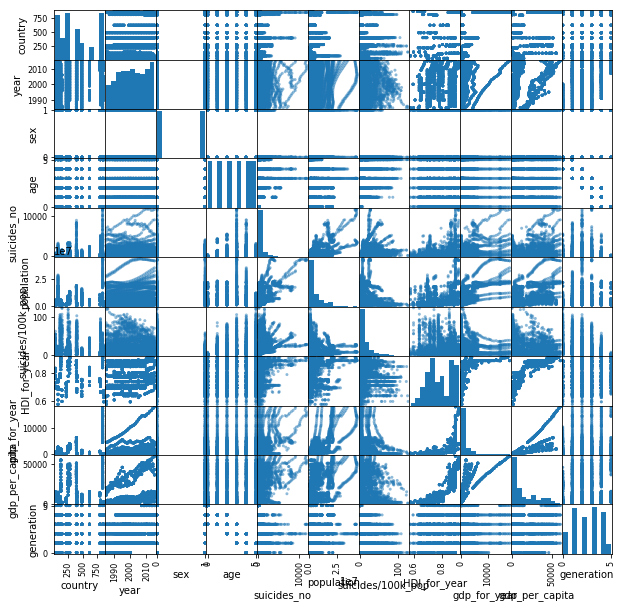

In [0]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## $X_3$: Ensayo de modelos:

Modelos de regresion conocidos:

- **DecisionTreeRegressor** 
- **SVR** 
- **RandomForestRegressor** 
- **LinearRegression** 
- **Ridge** 
- **RidgeCV** 
- **Lasso**
- **BayesianRidge** 
- **Logistic regression** 
- **PolynomialFeatures** 


In [0]:
X = d.values[:,[0,1,2,3,5,7,8,9,10]]
y = d.values[:,4]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

lr = LinearRegression()
lr.fit(d_train, c_train)
print "acierto en train", lr.score(d_train, c_train)
print "acierto en test ", lr.score(d_test, c_test)

predicciones_train = lr.predict(d_train)
predicciones_test  = lr.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 0.571517683001
acierto en test  0.548359382885


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

dt = DecisionTreeRegressor()
dt.fit(d_train, c_train)
print "acierto en train", dt.score(d_train, c_train)
print "acierto en test ", dt.score(d_test, c_test)

predicciones_train = dt.predict(d_train)
predicciones_test  = dt.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 1.0
acierto en test  0.975130987798


In [0]:
from sklearn.ensemble import RandomForestRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

rf = RandomForestRegressor()
rf.fit(d_train, c_train)
print "acierto en train", rf.score(d_train, c_train)
print "acierto en test ", rf.score(d_test, c_test)

predicciones_train = rf.predict(d_train)
predicciones_test  = rf.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 0.997802535021
acierto en test  0.990327528275


In [0]:
from sklearn.svm import SVR
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape



svrr = SVR(kernel='rbf')
svrr.fit(x_train, y_train)
print "acierto en train", svrr.score(x_train, y_train)
print "acierto en test ", svrr.score(x_test, y_test)

predicciones_train = svrr.predict(x_train)
predicciones_test  = svrr.predict(x_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train -0.146802760843
acierto en test  -0.145474281504


In [0]:
from sklearn.svm import SVR
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape



svrp = SVR(kernel='poly')
svrp.fit(x_train, y_train)
print "acierto en train", svrp.score(x_train, y_train)
print "acierto en test ", svrp.score(x_test, y_test)

predicciones_train = svrp.predict(x_train)
predicciones_test  = svrp.predict(x_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [0]:
from sklearn.linear_model import RidgeCV

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

rcv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
rcv.fit(d_train, c_train)
print "acierto en train", rcv.score(d_train, c_train)
print "acierto en test ", rcv.score(d_test, c_test)

predicciones_train = rcv.predict(d_train)
predicciones_test  = rcv.predict(d_test)


dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train -3523044.77727
acierto en test  -3588751.55051


## $X_4$: Interpretacion y pruebas del modelo seleccionado:

DecisionTreeRegressor

In [0]:
print X[100,]
print y[100]

[32 1993 1 5 698400 0.78 236.74200000000002 7768 0]
58


In [0]:
prueba0 = np.array([[32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0]],
      dtype=object)
print prueba0
print dt.predict(prueba0)

[[32 1993 1 5 698400 0.78 236.74200000000002 7768 0]]
[ 58.]


### Hipotesis 1:  El año afecta minimamente al numero de suicidios


In [0]:
def year(sample, index):
    for i in np.unique(d.year):
        sample[0][1] = i
        eje.append(dt.predict(sample))

    plt.xlabel('Year')
    plt.ylabel('Suicides No')
    titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
    plt.title(titulo)  
    plt.plot(np.unique(d.year),eje)

    return d[d.index == index]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
4672,860,1991,1,5,30,216200,13.88,0.65,13.678,788,0


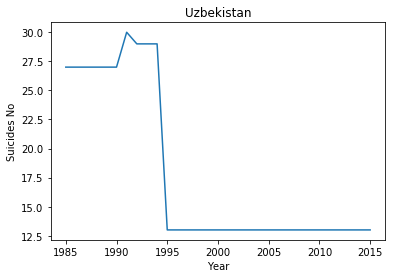

In [0]:
eje = []
import random
tamano = len(X)

ran = random.randrange(tamano)

sample = np.array([X[4672]],dtype=object)
year(sample = sample, index = 4672)

In [0]:
d_year=d
d_year.year=np.random.permutation(d_year.year)
d_year.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,2000,0,5,202,363000,55.65,0.694,88.417,3264,0
1,32,2014,0,4,485,1997000,24.29,0.694,88.417,3264,0
2,32,2013,0,3,414,3346300,12.37,0.694,88.417,3264,1
3,32,1986,1,4,210,2304000,9.11,0.694,88.417,3264,0
4,32,1998,0,2,177,2234200,7.92,0.694,88.417,3264,2


In [0]:
X = d_year.values[:,[0,1,2,3,5,7,8,9,10]]
y = d_year.values[:,4]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

dt = DecisionTreeRegressor()
dt.fit(d_train, c_train)
print "acierto en train", dt.score(d_train, c_train)
print "acierto en test ", dt.score(d_test, c_test)

predicciones_train = dt.predict(d_train)
predicciones_test  = dt.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 1.0
acierto en test  0.980407299137


## <center>Conclusión
    
   Despues de permutar la columna year y hacer nuevamente el entrenamiento y prediccion, podemos observar que el resultado es muy similar, por lo tanto podemos comprobar la hipotesis que el año no influye en gran medida en la variacion de suicidios

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
3041,398,2013,1,5,48,307080,15.63,0.785,236.635,15552,1


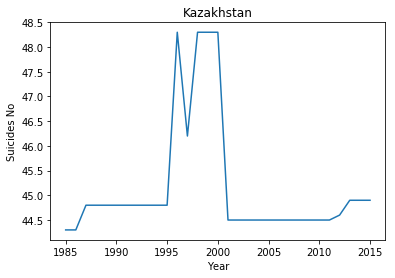

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.year):
  sample[0][1] = i
  eje.append(rf.predict(sample))
 
plt.xlabel('Year')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.year),eje)

d[d.index == ran]

### Hipotesis 2: El sexo influye en gran medida.

[[250 2004 1 5 1750685 0.8490000000000001 2115.742 37240 1]]
('Reales:', 1233)
('Predichos:', array([ 543.]))


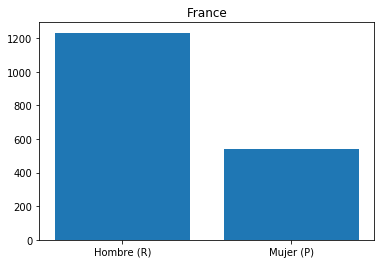

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1944,250,2004,0,5,1233,1750685,70.43,0.849,2115.742,37240,1


In [0]:
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)

if (d.sex[d.index == ran].values[0] == 0):
  sample[0][2] = 1
else:
  sample[0][2] = 0

predict = dt.predict(sample)

if (sample[0][2] == 1):
  bars = ('Hombre (R)','Mujer (P)')
else:
  bars = ('Mujer (R)','Hombre (P)')
 
print(sample)
print("Reales:",d.suicides_no[d.index == ran].values[0])
print("Predichos:",predict)

y_pos = np.arange(len(bars))
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.bar(y_pos,[d.suicides_no[d.index == ran].values[0], predict])
plt.xticks(y_pos, bars)
plt.show()

d[d.index == ran]

In [0]:
d_sex=d
d_sex.sex=np.random.permutation(d_sex.sex)
d_sex.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,2000,0,5,202,363000,55.65,0.694,88.417,3264,0
1,32,2014,0,4,485,1997000,24.29,0.694,88.417,3264,0
2,32,2013,1,3,414,3346300,12.37,0.694,88.417,3264,1
3,32,1986,1,4,210,2304000,9.11,0.694,88.417,3264,0
4,32,1998,0,2,177,2234200,7.92,0.694,88.417,3264,2


In [0]:
X = d_sex.values[:,[0,1,2,3,5,7,8,9,10]]
y = d_sex.values[:,4]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

dt = DecisionTreeRegressor()
dt.fit(d_train, c_train)
print "acierto en train", dt.score(d_train, c_train)
print "acierto en test ", dt.score(d_test, c_test)

predicciones_train = dt.predict(d_train)
predicciones_test  = dt.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 1.0
acierto en test  0.351511000872


## <center>Conclusión:
    Despues de permutar la columna sex realizamos el train y test nuevamente, y podemos observar que el metodo se ve bastante afectado

### Hipotesis 3: La poblacion influye en gran medida con el numero de suicidios.

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
2560,392,1999,0,2,2595,9242000,28.08,0.861,4562.079,38164,3


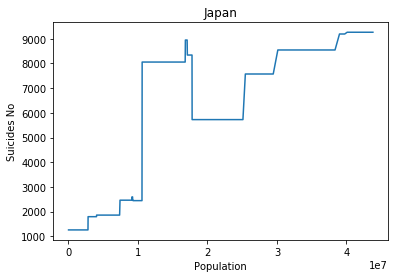

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.population):
  sample[0][4] = i
  eje.append(dt.predict(sample))

 
plt.xlabel('Population')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.population),eje)

d[d.index == ran]

In [0]:
d_population=d
d_population.population=np.random.permutation(d_population.population)
d_population.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,2000,0,5,202,1018423,55.65,0.694,88.417,3264,0
1,32,2014,0,4,485,1344897,24.29,0.694,88.417,3264,0
2,32,2013,1,3,414,1123771,12.37,0.694,88.417,3264,1
3,32,1986,1,4,210,2678474,9.11,0.694,88.417,3264,0
4,32,1998,0,2,177,3125122,7.92,0.694,88.417,3264,2


In [0]:
X = d_population.values[:,[0,1,2,3,5,7,8,9,10]]
y = d_population.values[:,4]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

dt = DecisionTreeRegressor()
dt.fit(d_train, c_train)
print "acierto en train", dt.score(d_train, c_train)
print "acierto en test ", dt.score(d_test, c_test)

predicciones_train = dt.predict(d_train)
predicciones_test  = dt.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 1.0
acierto en test  0.344402275451


## <center>Conclusión:
    Despues de permutar la columna population realizamos el train y test nuevamente, y podemos observar que el metodo se ve bastante afectado

## Hipotesis 4: El HDI afecta en gran medida 

In [0]:
d_hdi=d
d_hdi.HDI_for_year=np.random.permutation(d_hdi.HDI_for_year)
d_hdi.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,2000,0,5,202,1018423,55.65,0.838,88.417,3264,0
1,32,2014,0,4,485,1344897,24.29,0.811,88.417,3264,0
2,32,2013,1,3,414,1123771,12.37,0.881,88.417,3264,1
3,32,1986,1,4,210,2678474,9.11,0.662,88.417,3264,0
4,32,1998,0,2,177,3125122,7.92,0.771,88.417,3264,2


In [0]:
X = d_hdi.values[:,[0,1,2,3,5,7,8,9,10]]
y = d_hdi.values[:,4]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

dt = DecisionTreeRegressor()
dt.fit(d_train, c_train)
print "acierto en train", dt.score(d_train, c_train)
print "acierto en test ", dt.score(d_test, c_test)

predicciones_train = dt.predict(d_train)
predicciones_test  = dt.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 1.0
acierto en test  0.356977032577


## <center>Conclusión:
    Despues de permutar la columna HDI_for_year realizamos el train y test nuevamente, y podemos observar que el metodo se ve bastante afectado

<h2><strong><center>Con ayuda del modelo presentado se pueden realizar predicciones con respecto al comportamiento de los suicidios de un pais si este cambia las condiciones de vida a sus habitante, teniendo como foco aquellos aspectos que afectan en mayor medida esta tasa.</strong></h2>



#  <center>      ¡Gracias! </center>

[[616 1991 1 0 4987100 0.8029999999999999 85.501 2416 2]]
[[616 1991 1 1 4987100 0.8029999999999999 85.501 2416 2]]
[[616 1991 1 2 4987100 0.8029999999999999 85.501 2416 2]]
[[616 1991 1 3 4987100 0.8029999999999999 85.501 2416 2]]
[[616 1991 1 4 4987100 0.8029999999999999 85.501 2416 2]]
[[616 1991 1 5 4987100 0.8029999999999999 85.501 2416 2]]


,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
3462,616,1991,1,3,358,4987100,7.18,0.803,85.501,2416,2


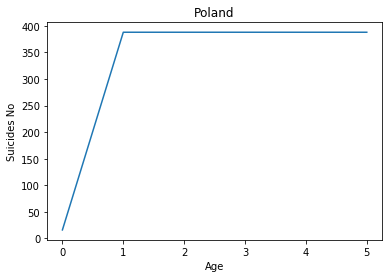

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.age):
  sample[0][3] = i
  print(sample)
  eje.append(dt.predict(sample))

 
plt.xlabel('Age')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.age),eje)

d[d.index == ran]

In [ ]:
!jupyter nbconvert PROYECTO_SUICIDIOS.ipynb --to slides --post serve 
!--SlidesExporter.reveal_theme=serif 
!--SlidesExporter.reveal_scroll=True 
!--SlidesExporter.reveal_transition=none

[NbConvertApp] Converting notebook PROYECTO_SUICIDIOS.ipynb to slides
[NbConvertApp] Writing 824993 bytes to PROYECTO_SUICIDIOS.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/PROYECTO_SUICIDIOS.slides.html
Use Control-C to stop this server
